In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.simplefilter("ignore")

from sklearn import datasets
boston = datasets.load_boston()
print(boston.DESCR)

raw_pd = pd.DataFrame(boston.data, columns=boston.feature_names)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 1. Business Understanding

## 2. Data Understanding

#### 2.1 ดู contents 5 rows แรก

In [3]:
raw_pd.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### 2.2 ดู Shape ของข้อมูล พบว่า เป็นแบบ 2 Dimensions

In [4]:
raw_pd.shape

(506, 13)

#### 2.3 ดู Data Type ของแต่ละ Attributes

In [5]:
raw_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


#### 2.4 ตรวจสอบค่า Null ในแต่ละ Attributes

In [6]:
raw_pd.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [7]:
# กำหนด Cols ที่ contain NULL แต่ธุรกิจจำเป็นต้องใช้
nullNeedCol_list = []

#### 2.5 EDA with Frequency Distribution เพื่อดู Bias

In [8]:
# Define categorical columns
categorical_list = list(raw_pd.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical_list}")

# Define numerical columns
numerical_list = list(raw_pd.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical_list}")

Categorical columns are: []
Numerical columns are: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


#### 2.6 EDA with Frequency Distribution of Categorical Values

In [9]:
for item_cat in categorical_list:
    print(raw_pd.groupby(item_cat).agg({item_cat:'count'})\
          .apply(lambda x:100 * x / float(x.sum()))\
    .apply(lambda x: x.sort_values(ascending=False)))

In [10]:
for item_cat in categorical_list:
    print(raw_pd[item_cat].value_counts())

#### 2.7 EDA with Frequency Distribution of Numerical Values

In [11]:
for item_num in numerical_list:
    print(raw_pd.groupby(item_num).agg({item_num:'count'})\
          .apply(lambda x:100 * x / float(x.sum()))\
    .apply(lambda x: x.sort_values(ascending=False)))

              CRIM
CRIM              
14.33370  0.395257
0.01501   0.395257
1.05393   0.197628
1.41385   0.197628
1.38799   0.197628
...            ...
0.11069   0.197628
0.11027   0.197628
0.10959   0.197628
0.10793   0.197628
88.97620  0.197628

[504 rows x 1 columns]
              ZN
ZN              
0.0    73.517787
20.0    4.150198
80.0    2.964427
22.0    1.976285
12.5    1.976285
25.0    1.976285
40.0    1.383399
30.0    1.185771
45.0    1.185771
90.0    0.988142
21.0    0.790514
60.0    0.790514
33.0    0.790514
95.0    0.790514
75.0    0.592885
70.0    0.592885
55.0    0.592885
28.0    0.592885
52.5    0.592885
35.0    0.592885
34.0    0.592885
82.5    0.395257
85.0    0.395257
18.0    0.197628
17.5    0.197628
100.0   0.197628
           INDUS
INDUS           
18.10  26.086957
19.58   5.928854
8.14    4.347826
6.20    3.557312
21.89   2.964427
...          ...
2.31    0.197628
2.97    0.197628
3.75    0.197628
4.00    0.197628
0.46    0.197628

[76 rows x 1 columns]
         

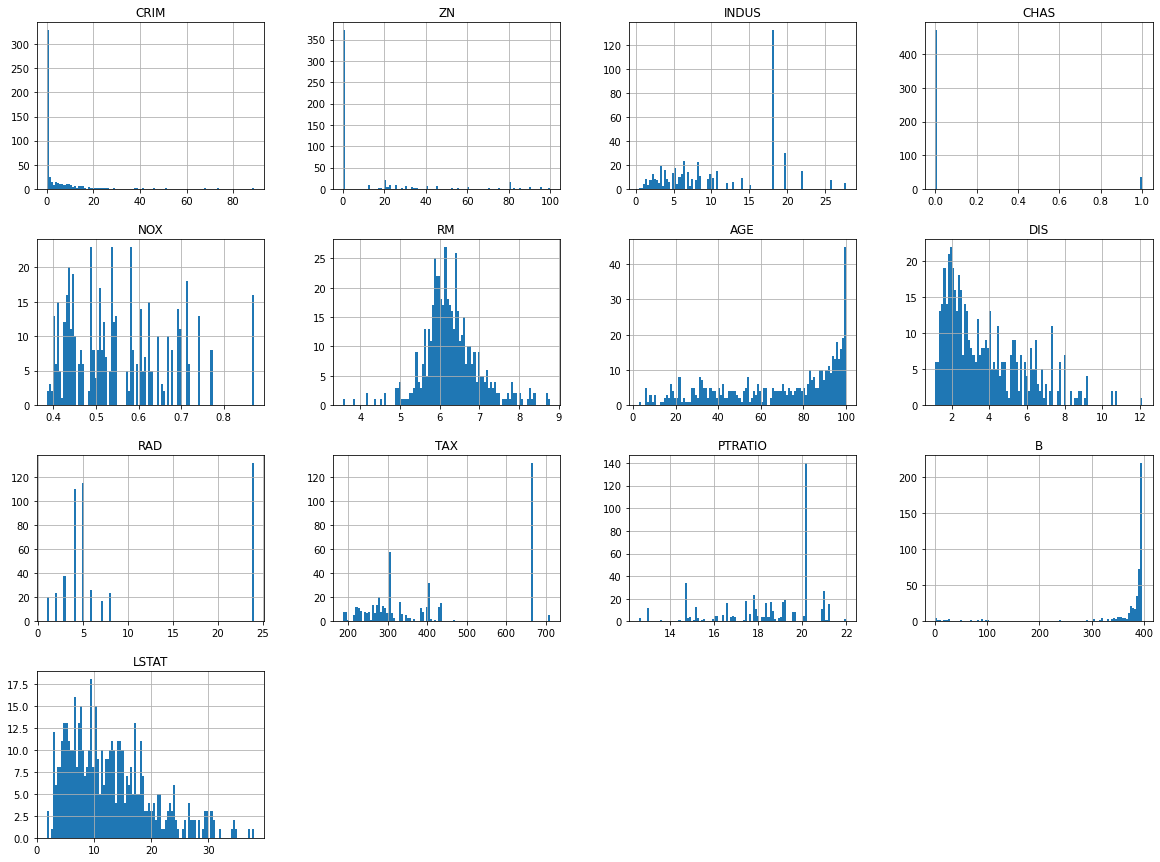

In [12]:
raw_pd.hist(bins=100, figsize=(20,15))
plt.show()

#### 2.8 EDA with Basic Stats. เพื่อดู Dispersion ของข้อมูล

In [13]:
raw_pd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


#### 2.9 กำหนด Candidated Features

In [14]:
noNullCol_list = []

In [15]:
for item_col in raw_pd.columns.to_list():
    if raw_pd[item_col].isnull().sum() == 0:
        noNullCol_list.append(item_col)
        

In [16]:
noNullCol_list

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [17]:
candidatedFeatures_list = noNullCol_list+nullNeedCol_list

In [18]:
candidatedFeatures_list

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [19]:
##### Revised 0.1
removedFeatures_list = []

In [20]:
candidatedFeatures_pd = raw_pd.filter(candidatedFeatures_list)\
.drop(removedFeatures_list, axis=1).dropna()

#### 2.10 EDA of Candidate Features with Checking for NULL

In [21]:
candidatedFeatures_pd.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [22]:
candidatedFeatures_pd.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
dtype: int64

## 3. Data Preparation

## 4. Modeling (Features Transformation and ML Algorithms)

In [23]:
import pandas as pd
from seaborn import load_dataset
import numpy as np

# Import modules for feature engineering and modeling
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [24]:
X_train = candidatedFeatures_pd

#### 4.1 ตรวจสอบว่า Features ไหนเป็น Categorical หรือ Numerical เพื่อเลือกทำ Transformation ให้เหมาะสมต่อไป

In [25]:
categorical = list(X_train.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: []
Numerical columns are: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [26]:
numerical.remove('TAX')

In [27]:
normalized = ['TAX']

#### 4.2 Define/Run a pipeline for transforming features and modeling

In [28]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [29]:
# Define custom transformer
class ColumnSelector(BaseEstimator, TransformerMixin):
    """Select only specified columns."""
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.columns]

# Define categorical pipeline
cat_pipe = Pipeline([('selector', ColumnSelector(categorical))
                     #,('imputer', SimpleImputer(strategy='constant', fill_value='missing'))
                     #,('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
                    ])

# Define numerical pipeline
num_pipe = Pipeline([('selector', ColumnSelector(numerical))
                     #,('imputer', SimpleImputer(strategy='median'))
                     #,('scaler', MinMaxScaler())
                    ])

norm_pipe = Pipeline([('selector', ColumnSelector(normalized))
                     #,('imputer', SimpleImputer(strategy='median'))
                     ,('scaler', MinMaxScaler())
                    ])

# Combine categorical and numerical pipeline
preprocessor = FeatureUnion(transformer_list=[('cat', cat_pipe),
                                              ('num', num_pipe),
                                              ('norm',norm_pipe)
                                             ])

# Pipelining and Defining Algorithm
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', KMeans(n_clusters=4))])

# Model Training
pipeline_model = pipe.fit(X_train)



## 5. Model Evaluation

#### 5.1 Get Clusters and cluster information

In [30]:
prediction = pipeline_model.predict(X_train)

In [31]:
X_train['category'] = prediction
X_train['PRICE'] = boston.target
boston_clusters = X_train.groupby('category').mean().sort_values('PRICE')
boston_clusters.index = ['low', 'mid_low', 'mid_high', 'high']
cols = ['PRICE'] + list(boston_clusters.columns[:-1])
boston_clusters = boston_clusters[cols]
boston_clusters[['PRICE', 'CRIM', 'RM', 'AGE', 'DIS']]


,PRICE,CRIM,RM,AGE,DIS
low,12.638889,14.867482,6.068944,89.344444,2.020372
mid_low,16.957576,7.075060,5.882000,92.263636,2.272336
mid_high,22.090102,3.548379,6.241471,82.107509,3.075698
high,27.184722,0.139315,6.518653,30.418750,6.051330


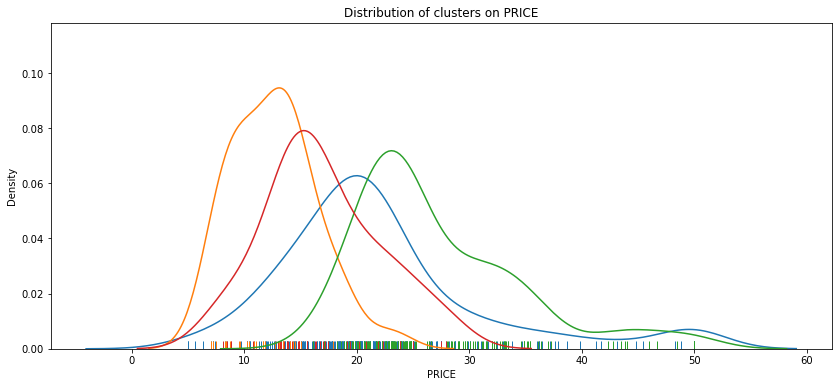

In [32]:
#Distribution of clusters on price
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(14,6))

sns.distplot(X_train[X_train.category == 0].PRICE, hist=False, rug=True)
sns.distplot(X_train[X_train.category == 1].PRICE, hist=False, rug=True)
sns.distplot(X_train[X_train.category == 2].PRICE, hist=False, rug=True)
sns.distplot(X_train[X_train.category == 3].PRICE, hist=False, rug=True)
ax.set_title("Distribution of clusters on PRICE");


In [33]:
# Fit several clustering models that take n_clusters
from sklearn.cluster import SpectralClustering, KMeans, MiniBatchKMeans, AgglomerativeClustering

algorithms = [SpectralClustering(n_clusters=4), 
          KMeans(n_clusters=4), 
          MiniBatchKMeans(n_clusters=4), 
          AgglomerativeClustering(n_clusters=4)]

for algorithms_item in algorithms:
    pipeline_model = pipe.fit(X_train)
    prediction = pipeline_model.predict(X_train)
    print(pipeline_model.named_steps['model'])
    print("\tFirst 5 labels", prediction[:5])
    print("\t", len(pipeline_model.named_steps['model'].labels_))


KMeans(n_clusters=4)
	First 5 labels [0 0 0 2 0]
	 506
KMeans(n_clusters=4)
	First 5 labels [0 0 0 2 0]
	 506
KMeans(n_clusters=4)
	First 5 labels [3 3 3 0 3]
	 506
KMeans(n_clusters=4)
	First 5 labels [0 0 0 2 0]
	 506


## Additional: Machine-readable before training model.

In [34]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,category,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,2,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,0,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,0,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,0,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,0,22.0


In [35]:
finalFeatures_list = numerical+normalized

In [36]:
finalFeatures_list

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'PTRATIO',
 'B',
 'LSTAT',
 'TAX']

In [37]:
pd.DataFrame(preprocessor.transform(X_train),columns=finalFeatures_list)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,0.208015
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,0.104962
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03,0.104962
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,0.066794
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,0.066794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,21.0,391.99,9.67,0.164122
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08,0.164122
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64,0.164122
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,6.48,0.164122
